<a href="https://colab.research.google.com/github/kahiga2244/week-7/blob/master/Moringa_Data_Science_Core_W7_Independent_Project_2020_06_06_JOSEPH_NDEGWA_DATA_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Defining The Question

a) Specifying the Question

As a Data Scientist, you work for Hass Consulting Company which is a real estate leader with over 25 years of experience. You have been tasked to study the factors that affect housing prices using the given information on real estate properties that was collected over the past few months. Later onwards, create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables. 

Metric for success.

As we try to solve our research problem,we will carry out the following procedures:

a) We will carry out univariate analysis where will plot pie charts and bar graphs to understand the data more.

b)We will also plot scatter plots and histograms to understand the relationship between variables during bivariate analysis
c)perform a pca
d)Perform regression

Data relevance

The data provided for this study is suitable to carry out the analysis and provide the information required.

importing the libraries

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.datasets import load_boston
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler

In [0]:
# installing !pip install pydataset and importing pydataset so as to use a dataset from the package
# 
!pip install pydataset
from pydataset import data 

Loading The Dataset

In [0]:
##loading the dataset
df = pd.read_csv('/content/Independent Project Week 7 - house_data.csv')

Checking Data

In [0]:
df.head()

id     price  bedrooms  ...     long  sqft_living15  sqft_lot15
0  7129300520  221900.0         3  ... -122.257           1340        5650
1  6414100192  538000.0         3  ... -122.319           1690        7639
2  5631500400  180000.0         2  ... -122.233           2720        8062
3  2487200875  604000.0         4  ... -122.393           1360        5000
4  1954400510  510000.0         3  ... -122.045           1800        7503

[5 rows x 20 columns]

In [0]:
df.tail()

id     price  bedrooms  ...     long  sqft_living15  sqft_lot15
21608   263000018  360000.0         3  ... -122.346           1530        1509
21609  6600060120  400000.0         4  ... -122.362           1830        7200
21610  1523300141  402101.0         2  ... -122.299           1020        2007
21611   291310100  400000.0         3  ... -122.069           1410        1287
21612  1523300157  325000.0         2  ... -122.299           1020        1357

[5 rows x 20 columns]

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

In [0]:
df.ndim

2

In [0]:
df.shape

(21613, 20)

In [0]:
df.dtypes

id                 int64
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [0]:
df['price'].unique()

array([221900., 538000., 180000., ..., 541800., 610685., 402101.])

In [0]:
df.describe()

id         price  ...  sqft_living15     sqft_lot15
count  2.161300e+04  2.161300e+04  ...   21613.000000   21613.000000
mean   4.580302e+09  5.401822e+05  ...    1986.552492   12768.455652
std    2.876566e+09  3.673622e+05  ...     685.391304   27304.179631
min    1.000102e+06  7.500000e+04  ...     399.000000     651.000000
25%    2.123049e+09  3.219500e+05  ...    1490.000000    5100.000000
50%    3.904930e+09  4.500000e+05  ...    1840.000000    7620.000000
75%    7.308900e+09  6.450000e+05  ...    2360.000000   10083.000000
max    9.900000e+09  7.700000e+06  ...    6210.000000  871200.000000

[8 rows x 20 columns]

Consistency

In [0]:
df.duplicated().values.any()

True

In [0]:
df = df.drop_duplicates()

In [0]:
df.duplicated().values.any()

False

Uniformity and Validity

In [0]:
# We remove whitespaces from our rows
# We also ensure that our rows are of the same case

df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('.', '_').str.replace(',','')
df.head()


id     price  bedrooms  ...     long  sqft_living15  sqft_lot15
0  7129300520  221900.0         3  ... -122.257           1340        5650
1  6414100192  538000.0         3  ... -122.319           1690        7639
2  5631500400  180000.0         2  ... -122.233           2720        8062
3  2487200875  604000.0         4  ... -122.393           1360        5000
4  1954400510  510000.0         3  ... -122.045           1800        7503

[5 rows x 20 columns]

In [0]:
df.drop(['id','zipcode','lat','long'],axis=1)

price  bedrooms  bathrooms  ...  yr_renovated  sqft_living15  sqft_lot15
0      221900.0         3       1.00  ...             0           1340        5650
1      538000.0         3       2.25  ...          1991           1690        7639
2      180000.0         2       1.00  ...             0           2720        8062
3      604000.0         4       3.00  ...             0           1360        5000
4      510000.0         3       2.00  ...             0           1800        7503
...         ...       ...        ...  ...           ...            ...         ...
21608  360000.0         3       2.50  ...             0           1530        1509
21609  400000.0         4       2.50  ...             0           1830        7200
21610  402101.0         2       0.75  ...             0           1020        2007
21611  400000.0         3       2.50  ...             0           1410        1287
21612  325000.0         2       0.75  ...             0           1020        1357

[21610 rows x 16 columns]

Completeness

In [0]:
df.isnull().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Tyding the dataset

Numerical Data

In [0]:
#Check for numerical variables
print(f'price:{pd.api.types.is_numeric_dtype(df.price)}')
print(f'sqft_lot:{pd.api.types.is_numeric_dtype(df.sqft_lot)}')
print(f'sqft_lot15:{pd.api.types.is_numeric_dtype(df.sqft_lot15)}')


price:True
sqft_lot:True
sqft_lot15:True


Outlier ranges for numerical value for merged dataset.
 [[1230000.0, 2000000.0, 1350000.0, 1330000.0, 1450000.0, 2250000.0, 1510000.0, 2400000.0, 2900000.0, 1370000.0, 2050000.0, 3080000.0, 2380000.0, 1380000.0, 1400000.0, 1350000.0, 1550000.0, 1300000.0, 1450000.0, 1200000.0, 1150000.0, 1390000.0, 1280000.0, 1200000.0, 1490000.0, 2250000.0, 1600000.0, 2130000.0, 1450000.0, 1950000.0, 1220000.0, 3070000.0, 1250000.0, 1150000.0, 1480000.0, 1580000.0, 1300000.0, 1310000.0, 2250000.0, 1360000.0, 1220000.0, 2400000.0, 1270000.0, 1200000.0, 1320000.0, 2450000.0, 1240000.0, 1570000.0, 1200000.0, 1280000.0, 1960000.0, 1750000.0, 5110000.0, 1150000.0, 1880000.0, 1230000.0, 2300000.0, 2260000.0, 5300000.0, 1200000.0, 2200000.0, 1180000.0, 1700000.0, 1400000.0, 2540000.0, 1360000.0, 1230000.0, 5350000.0, 1330000.0, 1220000.0, 1250000.0, 1300000.0, 1180000.0, 1380000.0, 1150000.0, 1200000.0, 2250000.0, 1230000.0, 1270000.0, 1680000.0, 1930000.0, 1180000.0, 2350000.0, 1140000.0, 1320000.0, 1430000

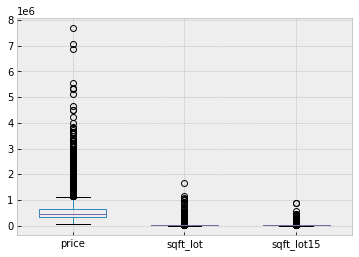

In [0]:
#checking for the outliers
# Detection and plotting out of outliers

plt.style.use('bmh')

numerical_df = df[['price','sqft_lot','sqft_lot15']]
_t, df_outliers = pd.DataFrame.boxplot(numerical_df, return_type="both", widths=0.6)

outliers = [flier.get_ydata() for flier in df_outliers["fliers"]]
out_liers = [i.tolist() for i in outliers]


print("Outlier ranges for numerical value for merged dataset.\n", out_liers)

In [0]:
# Function for counting number of outliers in our data columns and cheking the percentage for each
# ----
#

def detect_outlier(df):
    outliers=[]
    threshold=3
    mean_1 = np.mean(df)
    std_1 =np.std(df)
    
    for y in df:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

In [0]:
# Counting number of outliers in our data columns and cheking the percentage for each column using z-score
#
#
for col in numerical_df:
    rows, columns = numerical_df.shape
    percent_coefficient = float(100 / rows)
    outliers = detect_outlier(numerical_df[col])
    outliers_count = len(outliers)
    outliers_percentage = outliers_count * percent_coefficient
    print(f"{col} has {outliers_count} outliers in total, which is {outliers_percentage:.2}% of df")
    

price has 406 outliers in total, which is 1.9% of df
sqft_lot has 347 outliers in total, which is 1.6% of df
sqft_lot15 has 363 outliers in total, which is 1.7% of df


outliers in percentage of the total sum in each column in our dataset

In [0]:
# Dropping ouliers from our dataframe using a z-test
#
from scipy import stats

z = np.abs(stats.zscore(numerical_df))
print(z)

[[0.8663502  0.22833829 0.2607194 ]
 [0.00593105 0.18990485 0.18787651]
 [0.98040133 0.12332231 0.17238503]
 ...
 [0.37584596 0.33214719 0.39413652]
 [0.38156485 0.3070882  0.42050499]
 [0.58571365 0.33876198 0.41794139]]


In [0]:
# Confirming that our outliers have been dropped from the dataset.
#
df = numerical_df[(z < 3).all(axis=1)]

print(f"Previous dataframe size : {numerical_df.shape[0]}")
print(f"New dataframe size: {df.shape[0]}")

Previous dataframe size : 21610
New dataframe size: 20734


Categorical Variables

In [0]:
categorical_var = df[['bedrooms','bathrooms','floors','waterfront','view','condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated']]

In [0]:
for i in categorical_var:
  print(df[i].value_counts())
  print('*************************************')

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
8       13
0       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64
*************************************
2.50    5380
1.00    3852
1.75    3048
2.25    2047
2.00    1930
1.50    1446
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      72
4.75      23
5.00      21
5.25      13
0.00      10
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
8.00       2
6.25       2
6.50       2
6.75       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64
*************************************
1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: floors, dtype: int64
*************************************
0    21450
1      163
Name: waterfront, dtype: int64
*************************************
0    19489
2      963
3      510
1      332
4      319
Name: view, dtype: int64
******************

# Exploratory Data Analysis

Univariate Analysis

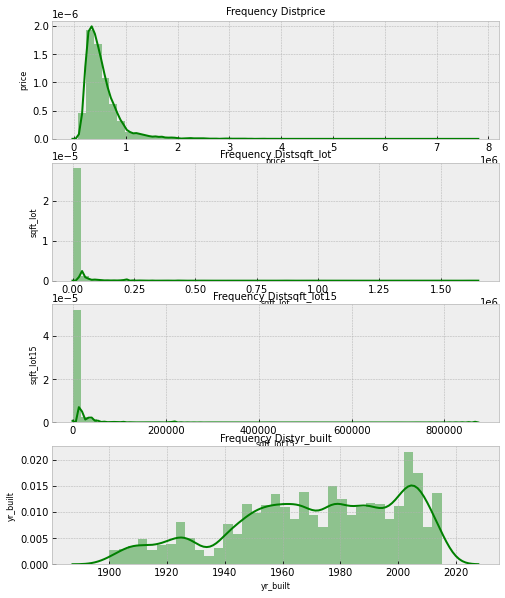

In [0]:
# Ploting the univariate summaries and recording our observations
#
col_names = ['price','sqft_lot','sqft_lot15','yr_built']

fig,ax = plt.subplots(len(col_names), figsize=(8,10))

for i, col_val in enumerate(col_names):
  sns.distplot(df[col_val], hist=True, ax=ax[i], color='green')
  ax[i].set_title('Frequency Dist' +col_val, fontsize=10)
  ax[i].set_xlabel(col_val, fontsize=8)
  ax[i].set_ylabel(col_val, fontsize=8)
plt.show()

Conclusion

normally distributed

positively skewed to the right 

box plot

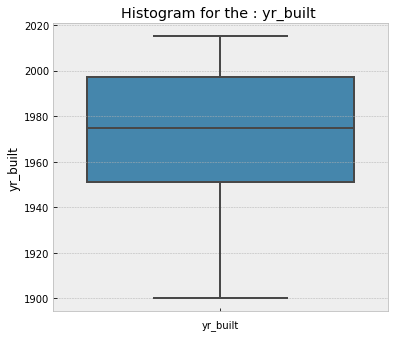

In [176]:
# for the summation from 1961 -2013

sns.boxplot(df['yr_built'], orient='v')
plt.title('Histogram for the : yr_built ')
plt.xlabel('yr_built', fontsize=10)

plt.subplots_adjust(top= 1.5,bottom=0.5,hspace=2)


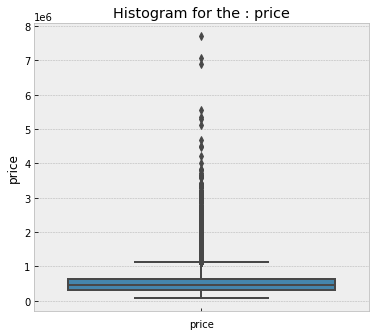

In [177]:
# for the summation from 1961 -2013

sns.boxplot(df['price'], orient='v')
plt.title('Histogram for the : price')
plt.xlabel('price', fontsize=10)

plt.subplots_adjust(top= 1.5,bottom=0.5,hspace=2)


Bivariate analysis

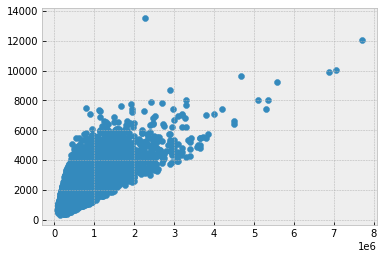

In [0]:
# Or Using Matplotlib: Plotting our scatterplot to compare the variables
plt.scatter(df["price"] , df["sqft_living"])

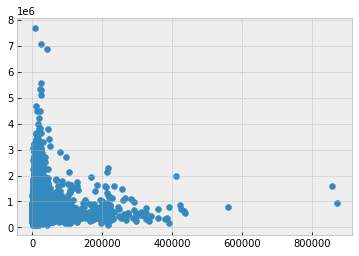

In [0]:
# Or Using Matplotlib: Plotting our scatterplot to compare the variables
plt.scatter(df["sqft_lot15"] , df["price"])

Text(0, 0.5, 'sqft_lot15')

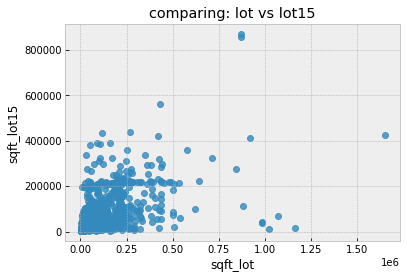

In [179]:
sns.regplot(df['sqft_lot'],df['sqft_lot15'], fit_reg= False )
plt.title('comparing: lot vs lot15')
plt.xlabel('sqft_lot')
plt.ylabel('sqft_lot15')

Text(0, 0.5, 'bedrooms')

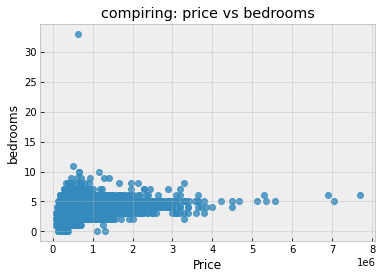

In [180]:
sns.regplot(df['price'],df['bedrooms'], fit_reg= False )
plt.title('compiring: price vs bedrooms')
plt.xlabel('Price')
plt.ylabel('bedrooms')

there is a close relation in price 

Correlation

In [0]:
# Calculating the pearson coefficient
pearson_coeff = df["price"].corr(df["sqft_lot"], method="pearson") 
print(pearson_coeff)

# Checking whether you have to define the pearson
coeff = df["price"].corr(df["sqft_lot"]) 
print(coeff)

0.08965520771082384
0.08965520771082384


In [0]:
# Calculating the pearson coefficient
pearson_coeff = df["price"].corr(df["sqft_living"], method="pearson") 
print(pearson_coeff)

# Checking whether you have to define the pearson
coeff = df["price"].corr(df["sqft_living"]) 
print(coeff)

0.7020437212325269
0.7020437212325269


In [0]:
# Calculating the pearson coefficient
pearson_coeff = df["price"].corr(df["yr_built"], method="pearson") 
print(pearson_coeff)

# Checking whether you have to define the pearson
coeff = df["price"].corr(df["yr_built"]) 
print(coeff)

0.05398182517966191
0.05398182517966191


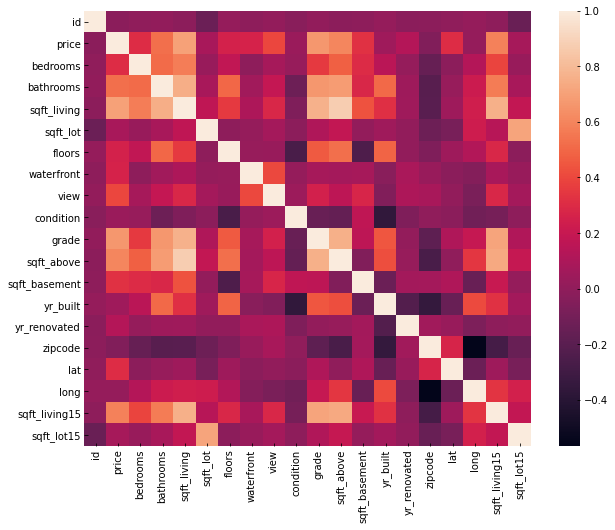

In [0]:
##correlation
f,ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

Text(0.5, 1.0, 'Pairplot of Numeric variables.')

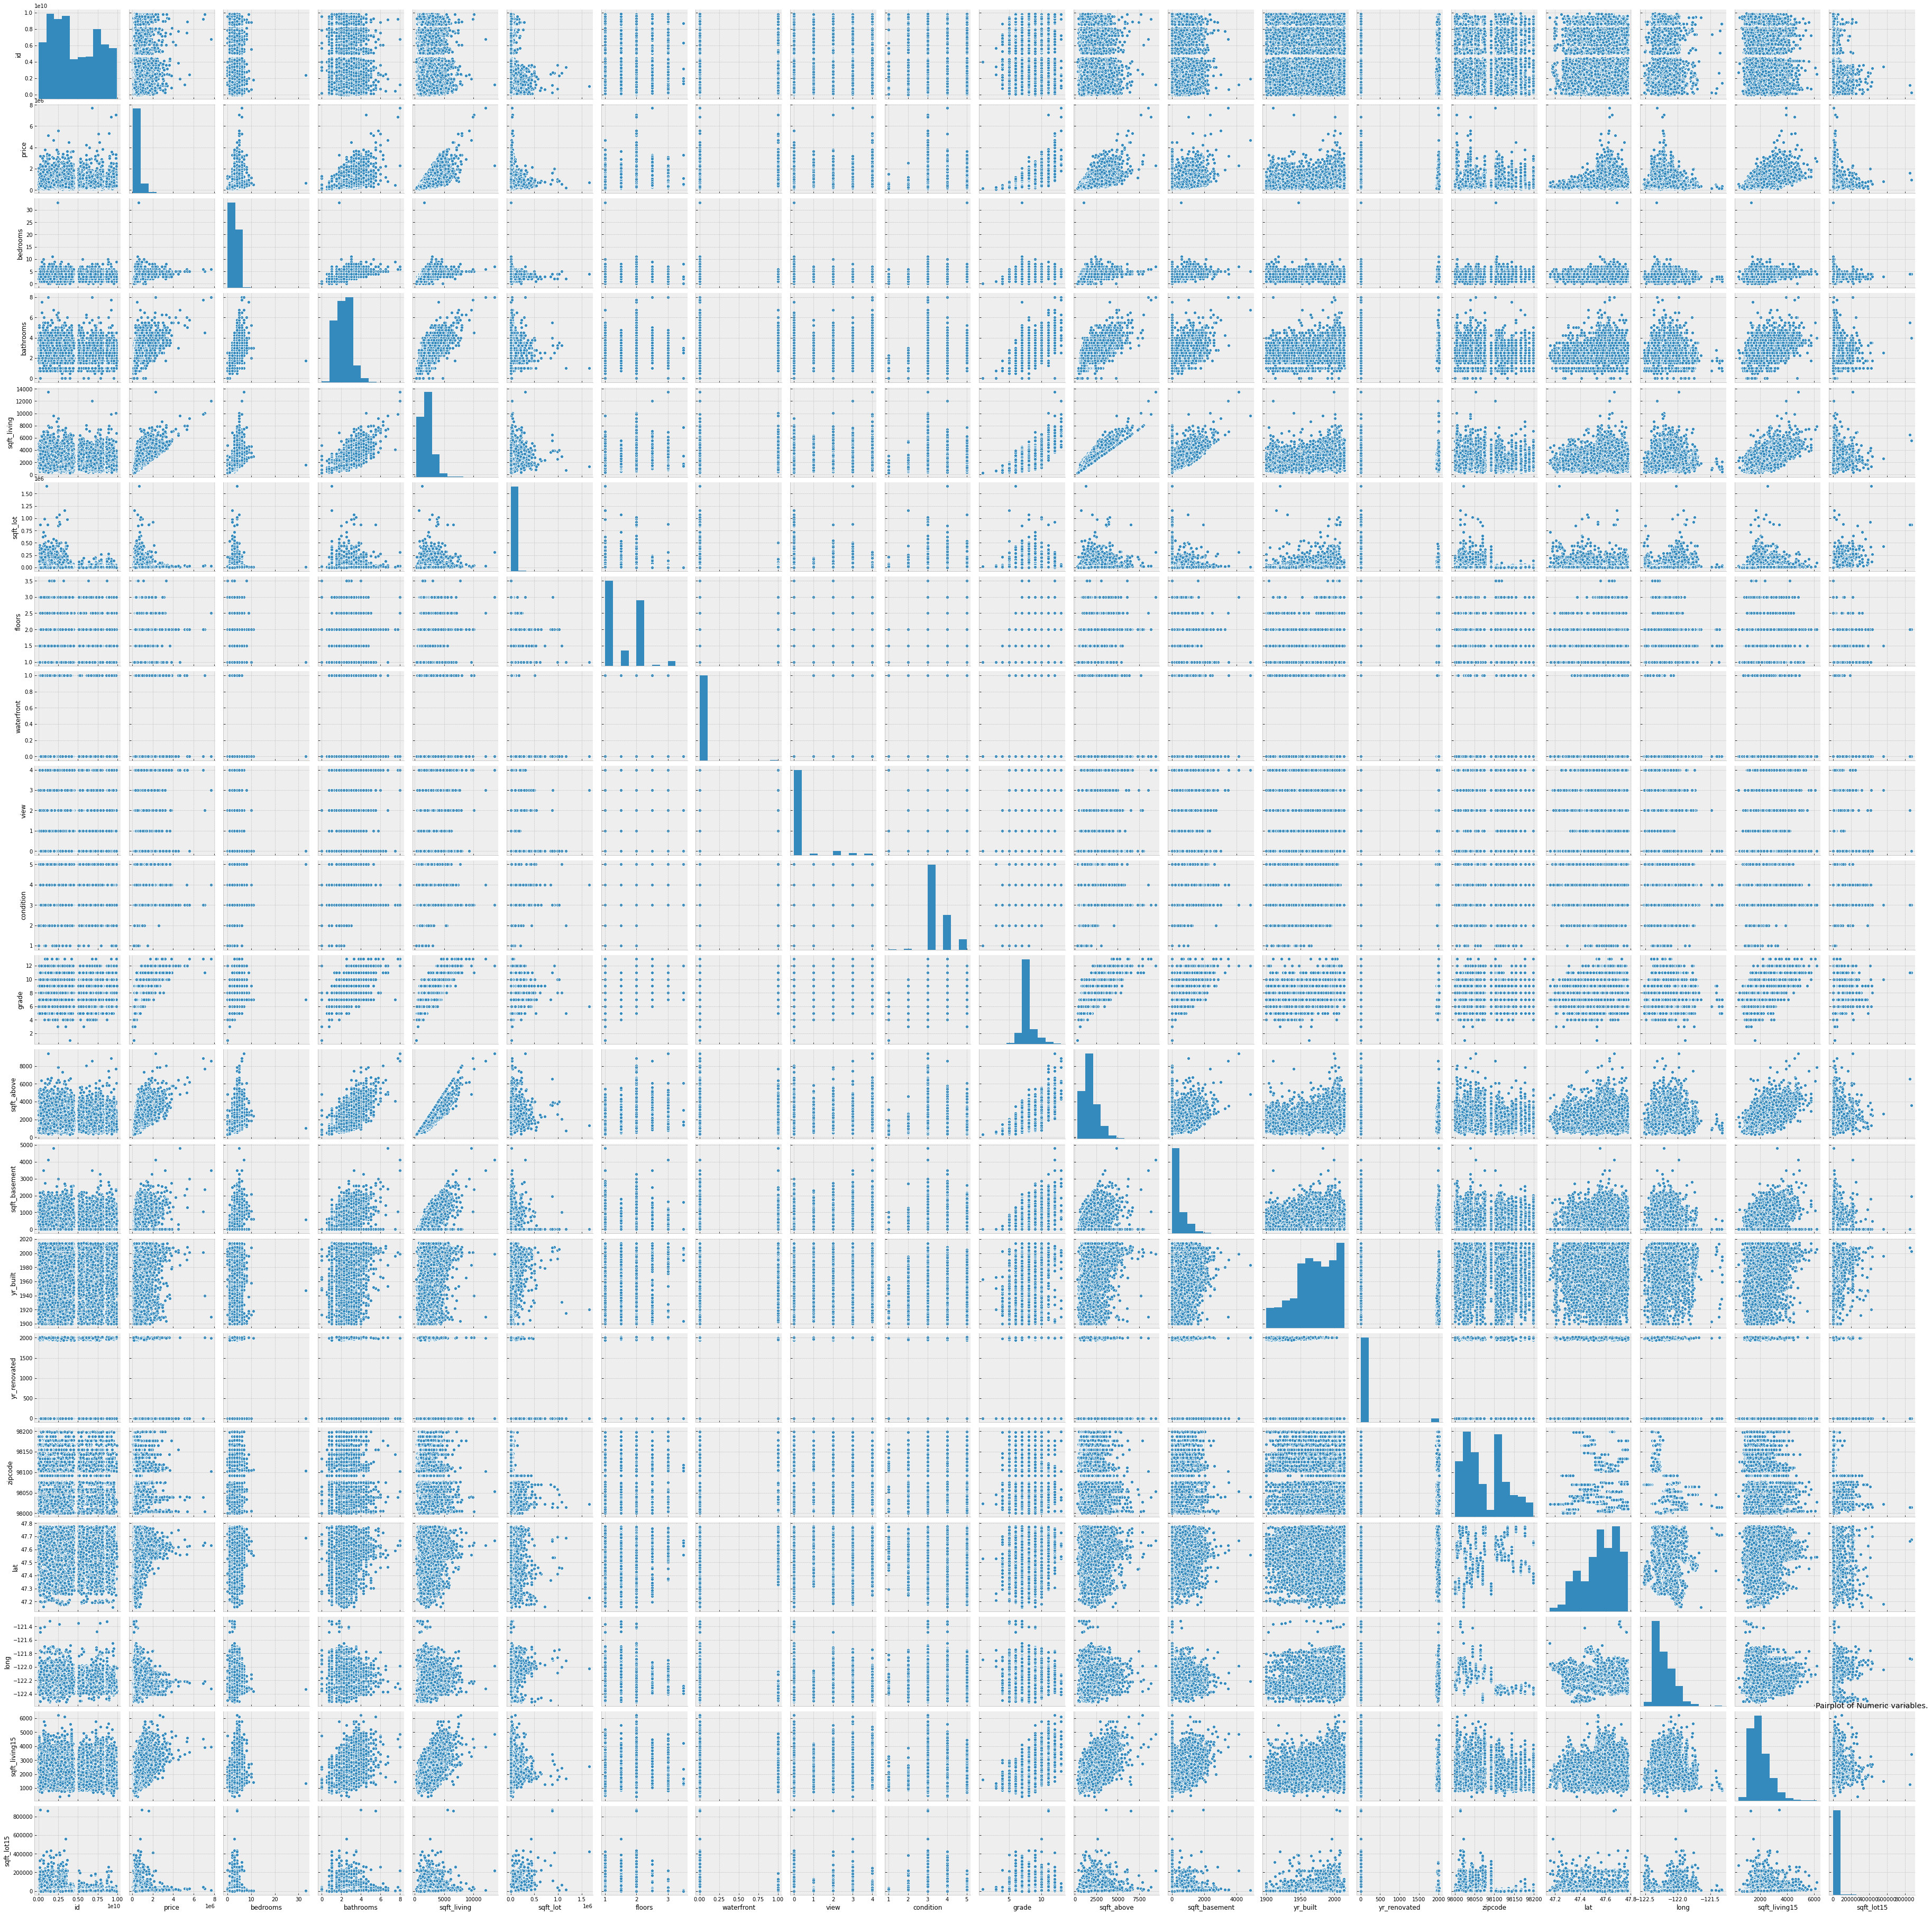

In [0]:
# drawing scatter plots on numeric variables to visualize any correlation
#
sns.pairplot(df)
plt.title("Pairplot of Numeric variables.")

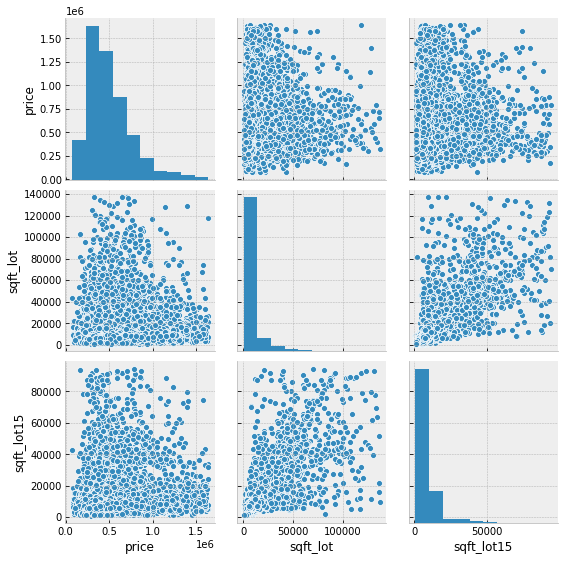

In [0]:
sns.pairplot(df)

Multivariate Analysis

principal component analysis

In [100]:
##
df.head()

id     price  bedrooms  ...     long  sqft_living15  sqft_lot15
0  7129300520  221900.0         3  ... -122.257           1340        5650
1  6414100192  538000.0         3  ... -122.319           1690        7639
2  5631500400  180000.0         2  ... -122.233           2720        8062
3  2487200875  604000.0         4  ... -122.393           1360        5000
4  1954400510  510000.0         3  ... -122.045           1800        7503

[5 rows x 20 columns]

In [0]:
X = df.drop(['price'], 1)
y = df['price']

In [121]:
# Training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
#Normalization
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
 #Applying PCA

from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

explained_variance = pca.explained_variance_ratio_
explained_variance

array([2.74912920e-01, 1.16528197e-01, 9.98079557e-02, 7.27230840e-02,
       6.47856260e-02, 5.29947538e-02, 5.00898864e-02, 4.53541978e-02,
       4.37788570e-02, 3.43095049e-02, 3.14801038e-02, 2.58055694e-02,
       2.10426496e-02, 1.69514482e-02, 1.42143638e-02, 1.33417262e-02,
       1.18833160e-02, 9.99584078e-03, 1.47199938e-33])

In [117]:
#Using one Principal Component
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
#Training and making predictions
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

#predicting the Test set results
y_pred = classifier.predict(X_test)
#Performance
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy', accuracy_score(y_test, y_pred))


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Accuracy 0.005320379366180893


In [125]:
#Results with 2 Principal Components
from sklearn.decomposition import PCA

pca = PCA(n_components=0.5)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
#Results with 2 Principal Components
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

pca = PCA(n_components=3)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [126]:
#Predicting the Test set results
y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Accuracy 0.008790191996298867


Quantile Regression

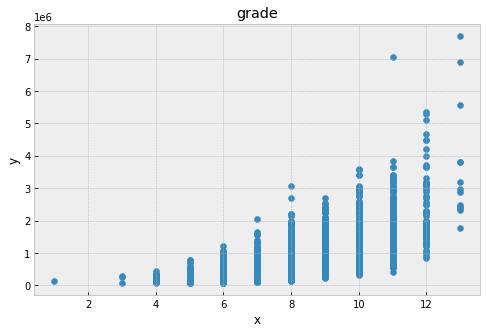

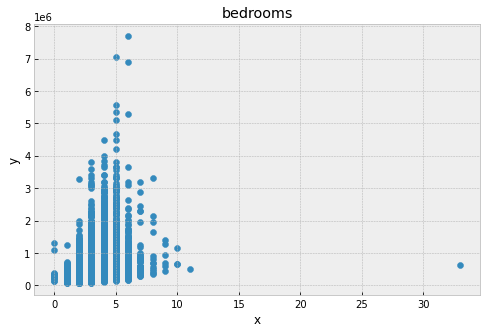

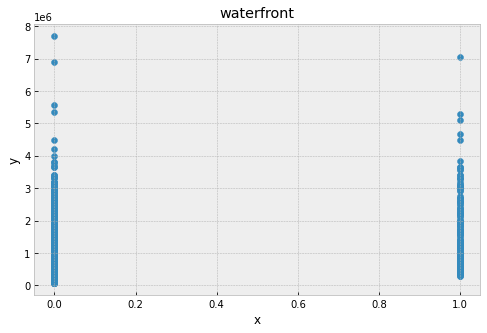

In [188]:
features = ['grade',	'bedrooms',	'waterfront']


for i,colval in enumerate(features):
  x = np.array(df[colval].values.reshape(-1,1))
  y = np.array(df['price'])

  figure,ax = plt.subplots(figsize=(8,5))
  
  plt.scatter(x,y)
  plt.xlabel("x")
  plt.ylabel("y")
  plt.title(f"{colval}")

In [190]:
from sklearn.linear_model import LinearRegression

for i, colval in enumerate(features):
  x = np.array(df[colval].values.reshape(-1,1))
  y = np.array(df['price'])

  model1 = LinearRegression(fit_intercept=True, normalize=False)
  model1.fit(x,y)

  y_pred1 = model1.predict(x)
  print(f"           | {colval} |\n")
  print("Mean squared error: {0:.2f}"
        .format(np.mean((y_pred1 - y) ** 2)))
  print('Variance score: {0:.2f}'.format(model1.score(x, y)))
  print("\n==============================\n")

           | grade |

Mean squared error: 74828211807.03
Variance score: 0.45


           | bedrooms |

Mean squared error: 122118841966.45
Variance score: 0.10


           | waterfront |

Mean squared error: 125376587309.56
Variance score: 0.07




Ridge Regression

In [191]:
df.head(2)

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15
0  221900.0         3       1.00         1180      5650     1.0           0     0          3      7        1180              0      1955             0    98178  47.5112 -122.257           1340        5650
1  538000.0         3       2.25         2570      7242     2.0           0     0          3      7        2170            400      1951          1991    98125  47.7210 -122.319           1690        7639

In [0]:
X = df[['grade','bedrooms','condition','bathrooms','sqft_living','sqft_lot','floors','sqft_basement']]
y = df[['price']]

In [207]:
# This is a model that has no regularization to it
# 
regression = LinearRegression()
regression.fit(X,y)
first_model = (mean_squared_error(y_true=y,y_pred=regression.predict(X)))
print(first_model)

59253523745.8111


In [0]:
ridge = Ridge(normalize=True)
search = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [201]:
search.fit(X,y)
search.best_params_
{'alpha': 0.05}
abs(search.best_score_) 


68281052877.60799

In [208]:
# We can confirm this by fitting our model with the ridge information and finding the mean squared error below
#
ridge = Ridge(normalize=True,alpha=0.01)
ridge.fit(X,y)
second_model = (mean_squared_error(y_true=y,y_pred=ridge.predict(X)))
print(second_model)

59265267509.73949


In [209]:
coef_dict_baseline = {}
for coef, feat in zip(regression.coef_,data("VietNamI").columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline


{'pharvis': array([ 1.10175327e+05, -4.52680335e+04,  5.80495267e+04, -1.83022829e+04,
         2.03780122e+02, -2.80405456e-01, -9.67399275e+02,  5.86753740e+01])}

Lasso Regression

In [136]:
df.head(4)

id     price  bedrooms  ...     long  sqft_living15  sqft_lot15
0  7129300520  221900.0         3  ... -122.257           1340        5650
1  6414100192  538000.0         3  ... -122.319           1690        7639
2  5631500400  180000.0         2  ... -122.233           2720        8062
3  2487200875  604000.0         4  ... -122.393           1360        5000

[4 rows x 20 columns]

In [139]:
df = df.drop(['id'], axis=1)
df.head(2)

price  bedrooms  bathrooms  ...     long  sqft_living15  sqft_lot15
0  221900.0         3       1.00  ... -122.257           1340        5650
1  538000.0         3       2.25  ... -122.319           1690        7639

[2 rows x 19 columns]

In [0]:
# Importing label encoder
# 
from sklearn.preprocessing import LabelEncoder
categorical_features = ['waterfront', 'view', 'condition','grade']
le = LabelEncoder()

In [0]:
# Importing StandardScaler
#
from sklearn.preprocessing import StandardScaler

# Creating features and target matrixes
#
X = df.drop(['price'], axis=1)
y = df[['price']]

In [0]:
# Scaling data 
#
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [162]:

# Importing linear models
# 
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

# Creating lasso object
# 
lasso = linear_model.Lasso() 

# Fitting the models
# 
lasso.fit(X, y) 

# Print scores, MSE, and coefficients
# 
print("lasso score:", lasso.score(X, y)) 
print("lasso MSE:", mean_squared_error(y, lasso.predict(X))) 
print("lasso coef:", lasso.coef_) 

lasso score: 0.6997525536733683
lasso MSE: 40518022116.35509
lasso coef: [-33292.21075087  31697.82535674 259457.31589161   5315.2138083
   3614.96948484  50439.07198689  40563.44510569  17186.55108076
 112827.34401399 -83763.68277541 -58548.42851749 -77025.47282042
   7962.04001793 -31167.26388666  83526.36572597 -30269.33526327
  14850.06168935 -10439.75419149]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27085655586135.5, tolerance: 291664766083.6765
  positive)


Elastic Net

In [0]:
X = df[['waterfront', 'view', 'condition','grade']]
y = df[['bedrooms']]

In [154]:
# Creating our linear regression model for the purpose of comparison
# 
regression=LinearRegression()
regression.fit(X,y)
first_model=(mean_squared_error(y_true=y,y_pred=regression.predict(X)))
print(first_model) 

0.7477890213380004


In [169]:
# Below are the coefficients of this first model. We use a for loop to go through 
# the model and the zip function to combine the two columns.
# 
coef_dict_baseline = {}
for coef, feat in zip(regression.coef_,X.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

AttributeError: ignored

In [0]:
elastic=ElasticNet(normalize=True)
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [168]:
##fitting the model
# 
search.fit(X,y)
search.best_params_
abs(search.best_score_)

41058369186.64148

7.Implementing the Solution

8.Challenging the solution

9.Follow up questions

a). Did we have the right data?

b). Do we need other data to answer our question?

c). Did we have the right question?